
# PIT - Práctica 2: Modelos ocultos de Markov (HMM)

**Alicia Lozano Díez**

24 de febrero de 2025

## Objetivos

Los objetivos de esta práctica son:
* Comprobación de las características de un HMM en función de sus parámetros.
* Resolución de los tres problemas asociados a un modelo oculto de Markov:
    * Cálculo de la verosimilitud de una secuencia de observaciones y un HMM mediante la implementación del algoritmo *Forward*.
    * Obtención de la secuencia de estados más probable dada una secuencia de observaciones mediante la implementación del algoritmo de *Viterbi*.
    * Entrenamiento de un HMM con *EM*, en concreto el algoritmo *Baum-Welch*.
* Utilización del paquete `hmmlearn` de `python` para la implementación de los algoritmos anteriores.
* Utilización de HMMs en un caso práctico de clasificación de patrones temporales.

## Materiales - Moodle
Los materiales proporcionados para esta práctica son:
- Guión (.ipynb) de la práctica
- Bases de datos para el ejercicio 3.
  - sin_averias.csv
  - fallo_componente.csv
  - uso_inapropiado.csv

### Autores (pareja 2):
* Rafael Domínguez Sáez
* Iñigo Martínez Ciriza

In [1]:
import numpy as np
from hmmlearn import hmm
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
#from google.colab import files
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

## PARTE 1: Introducción a los Modelos Ocultos de Markov (HMM)

### 1.1 Definición de un modelo oculto de Markov

Los modelos ocultos de Markov (*Hidden Markov Model* o *HMM*) es un modelo probabilístico generativo, en el cual una secuencia de variables observables $\mathrm{X}$ es generada por una secuencia de estados ocultos internos $\mathbf{\mathrm{Z}}$. Las transiciones entre estados se asume que siguen la forma de una cadena de Markov de primer orden, de tal forma que el estado en un instante determinado *t* solo depende del estado del modelo en el instante anterior *t-1*.

Un HMM se encuentra definido por:
* El número de estados del modelo $N$.
* Probabilidades iniciales de ocupación de cada estado $\pi$.
* Matriz de probabilidades de transición entre estados $\mathbf{A}$.
* Distribución de probabilidad de observación de cada estado $\mathbf{B}$.

**a. Dibuje el diagrama de estados correspondiente al HMM definido por los parámetros descritos a continuación:**

* Número de estados, $N=4$.
* Probabilidades iniciales de ocupación de cada estado:
$$
\pi = [0.4\; 0.3\; 0.2\; 0.1]
$$.
* Matriz de probabilidades de transición:
$$A=\begin{bmatrix}
0.75 & 0.1 & 0.05 & 0.1 \\
0.1 & 0.75 & 0.1 & 0.05 \\
0.05 & 0.1 & 0.75 & 0.1\\
0.1 & 0.05 & 0.1 & 0.75
\end{bmatrix}
$$

* Cada estado tiene una distribución de observación (o distribución de emisión) Gaussiana bivariada. Cada Gaussiana se encuentra caracterizada por los siguientes parámetros:

  - $\mathbf{B}_1$:
$$
\mu_1 = [-1,\;0]
\;;\; \Sigma_1 = \mathcal{I}*4
$$.

  - $\mathbf{B}_2$:
$$
\mu_2 = [5,\;-1]
\;;\; \Sigma_2 = \mathcal{I}
$$.

  - $\mathbf{B}_3$:
$$
\mu_3 = [4,\;7.5]
\;;\; \Sigma_3 = \begin{bmatrix}
5.0 & -2.0\\
-2.0 & 3.0
\end{bmatrix}
$$.

  - $\mathbf{B}_4$:
$$
\mu_4 = [-7.5,\;0]
\;;\; \Sigma_4 = \begin{bmatrix}
1.0 & 0.0\\
0.0 & 4.0
\end{bmatrix}
$$

**`Nota`**: Haga uso de la clase `GaussianHMM` de `hmmlearn` para la implementación de este modelo.

![alt text](Grafo_1.png)

**b.) Inicialice el HMM anterior mediante el uso de la clase ``hmmlearn.GaussianHMM``.**

El paquete `hmmlearn` [https://hmmlearn.readthedocs.io/en/latest/api.html] es un paquete de software libre desarrollado mediante el uso de scikit-learn, Numpy y matplotlib para el desarrollo e implementacion de los algoritmos destinados al entrenamiento, inferencia y muestreo de diferentes tipos modelos ocultos de Markov (HMM).

In [2]:
# Definición de las variables
# Número de estados
N = 4

# Matriz de Probabilidad de Transicion
A = np.array([[0.75, 0.1, 0.05, 0.1],
              [0.1, 0.75, 0.1 ,0.05],
              [0.05, 0.1, 0.75 ,0.1],
              [0.1, 0.05, 0.1 ,0.75]])

# Probabilidades iniciales de estado
pi = np.array([0.4, 0.3, 0.2, 0.1])

# TO DO: Utilización DE HMM.gaussianHMM para la definición del modelo
# Fijar la matriz de probabilidades de transición y los estados iniciales.
HMM1 = hmm.GaussianHMM(n_components=N, covariance_type="full")

HMM1.startprob_ = pi
HMM1.transmat_ = A

# Vectores de medias
mu = np.array([[-1.0, 0.0], [5.0, -1.0], [4, 7.5],[-7.5, 0.0]])

# Matrices de covarianza
Sigma = []
Sigma.append(np.identity(2)*4)
Sigma.append(np.identity(2))
Sigma.append(np.array([[5.0, -2], [-2, 3.0]]))
Sigma.append(np.array([[1.0, 0.0], [0.0, 4.0]]))
Sigma = np.array(Sigma)


# TO DO: fijar las medias y las matrices de covarianza de las distribuciones de observación

HMM1.means_ = mu

HMM1.covars_ = Sigma

HMM1.n_features = mu.shape[1]

**c.) Represente mediante curvas de contorno (función ``contour`` de pyplot) las distribuciones de probabilidad de observación de cada estado. Para la evaluación de la distribución de probabilidad en el plano de variables utilice la clase ``scipy.stats.multivariate_normal``.**

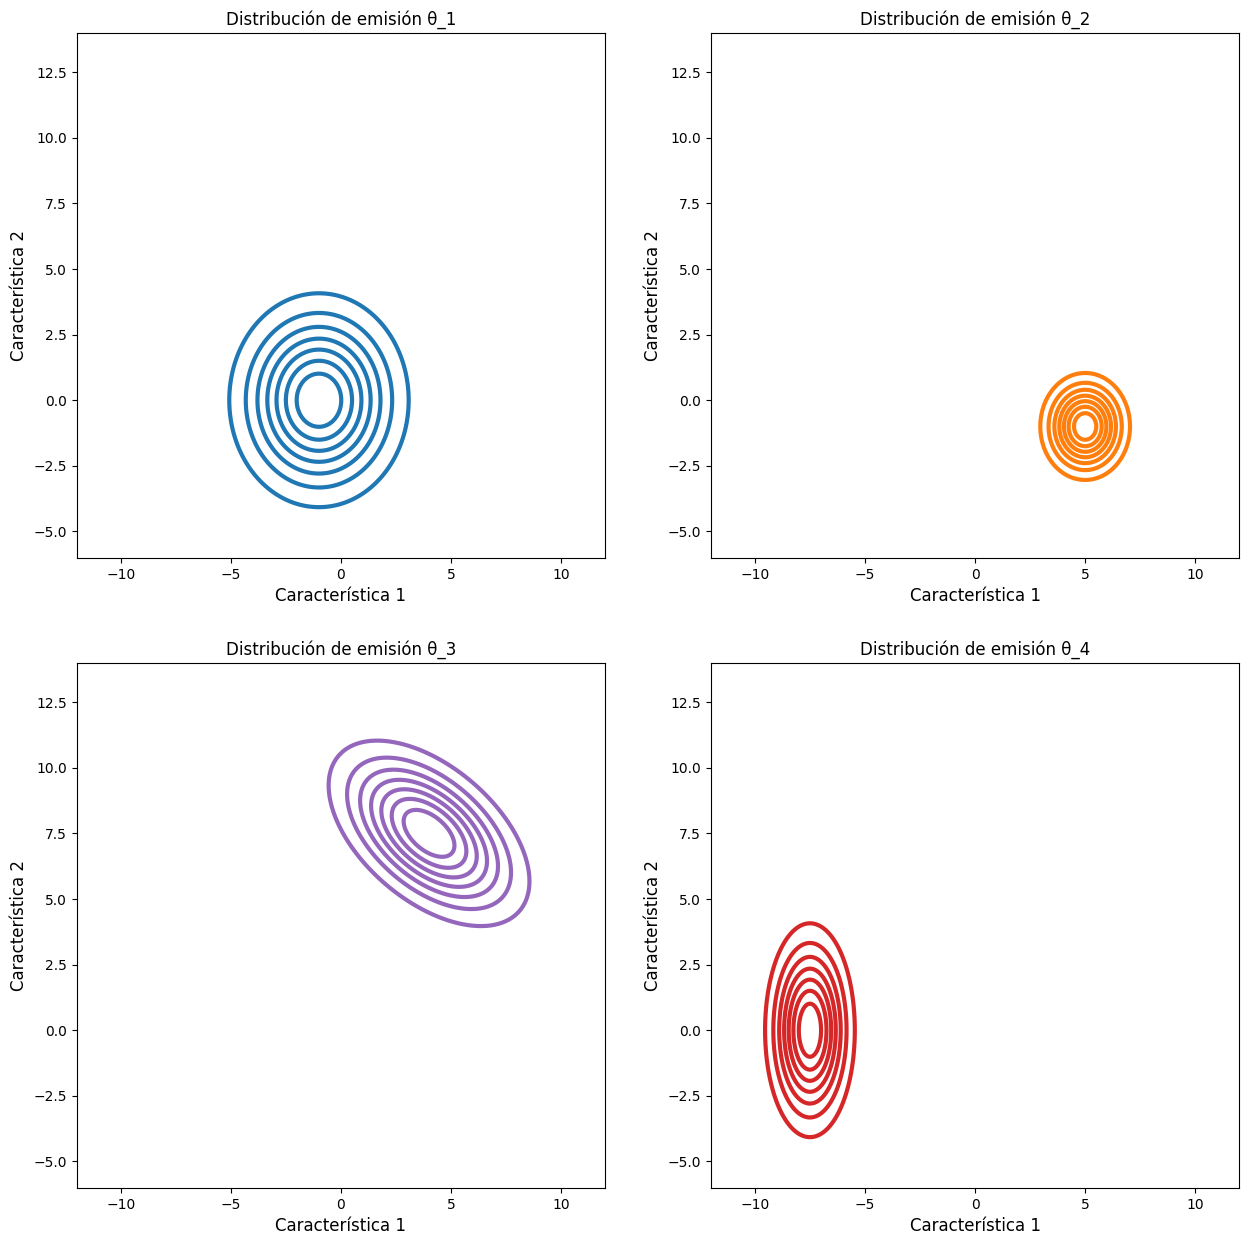

In [3]:
# Representación de las distribuciones de emisión para cada estado
# Definición de los ejes
x_axis = np.linspace(-12,12,300)
y_axis = np.linspace(-6,14,300)

# Generación de matrices con los ejes
_X, _Y = np.meshgrid(x_axis, y_axis)
# Agrupamiento por pares
positions = np.vstack([_X.ravel(), _Y.ravel()]).T

colors = ['tab:blue','tab:orange','tab:purple','tab:red']


# Generación de la figura
fig, ax = plt.subplots(2,2,figsize=(15, 15))
ax = ax.ravel()

for n in range(N):

    # TO DO: Evaluación de cada una de las componentes gaussianas en los ejes
    # Utilizar la clase scipy.stats.multivariate_normal
    eval_multivariate_normal = multivariate_normal.pdf(positions, HMM1.means_[n], HMM1.covars_[n])

    prob = np.reshape(eval_multivariate_normal, _X.shape)
    # Representación del contorno
    ax[n].contour(x_axis, y_axis, prob, colors=colors[n],linewidths=3)

    # Etiquetas y título
    ax[n].set_xlabel('Característica 1', fontsize=12)
    ax[n].set_ylabel('Característica 2', fontsize=12)
    ax[n].set_title('Distribución de emisión \u03B8_{:.0f}'.format(n+1) )

plt.show()

### 1.2 Proceso de generación de una secuencia
Vamos a hacer uso de un dataset sintético generado exclusivamente para su utilización en esta sesión de prácticas. Para la generación de esta base de datos hemos inicializado en el apartado anterior un modelo oculto de markov haciendo uso del paquete `hmmlearn`. Una vez inicializado el modelo, en este apartado vamos a aplicar el proceso de generación de secuencias para extraer muestras del modelo generativo.

**a.) Utilice la función `gaussianHMM.sample` para generar una secuencia de 4000 muestras del HMM.**

In [4]:
# Número de muestras de la secuencia
T = 4000
# TO DO: utilizar gaussianHMM.sample para generar la base de datos.
# X: np.array TxD -> Secuencia de observaciones
# Z: np.array Tx1 -> Estados ocultos
X, Z = HMM1.sample(T)

**b.) Represente las primeras `T_repr=50` muestras generadas mediante un scatter plot. Adicionalmente, con el objetivo de visualizar el caracter secuencial de los datos, represente cada una de las muestras unidas con líneas.**

**A partir de la representación, la matriz de probabilidades de transición y los estados ocultos generados, analice el comportamiento del modelo.**

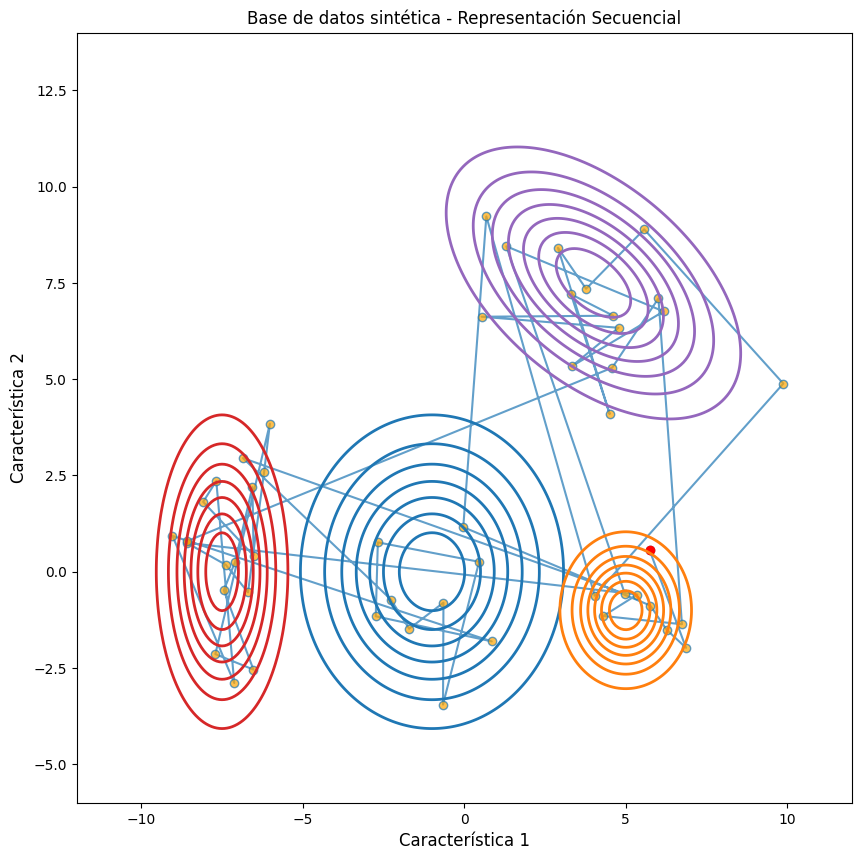

In [5]:
T_repr=50

# Representación de los datos mediante un scatter plot
fig,ax = plt.subplots(figsize=(10,10))

# Representación de los datos mediante un scatter plot
# Para mostrar el desarrollo de la secuencia
ax.plot(X[:T_repr,0],X[:T_repr,1],'o-',label='observations',mfc='orange',alpha=0.7)
ax.plot(X[0:1,0],X[0:1,1],'or')
ax.set_xlabel('Característica 1', fontsize=12)
ax.set_ylabel('Característica 2', fontsize=12)
ax.set_title('Base de datos sintética - Representación Secuencial' )

for n in range(N):
    #  TO DO: Evaluación de cada una de las componentes gaussianas en los ejes
    # y representación de los contornos
    eval_multivariate_normal = multivariate_normal.pdf(positions, HMM1.means_[n], HMM1.covars_[n])
    prob = np.reshape(eval_multivariate_normal, _X.shape)

    ax.contour(x_axis, y_axis, prob, colors=colors[n],linewidths=2)

plt.show()

A partir de la matriz de transiciones, podemos ver que es mucho más probable una vez se está en un estado, mantenerse en él. De hecho, hay una probabilidad del 75% mientras que para saltar de un estado a otro diferente hay una probabilidad del 25%. Esto es justo lo que se observa en la figura, donde las transiciones entre estados (las líneas largas) son mucho menos comunes que las transiciones dentro de un mismo estado.

### 1.3 Comparativa con otros modelos ocutos de Markov.

En este apartado se propone la definición de dos modelos alternativos al generado anteriormente.

**a.) Repita los apartados del ejercicio 1.1 y 1.2 con el modelo `HMM2` definido por los parámetros que se representan a continuación:**

* Número de estados, $N=4$.
* Probabilidades iniciales de estado:

$$
\pi = [0.4\; 0.3\; 0.2\; 0.1]
$$.

* Matriz de probabilidades de transición:
$$A=\begin{bmatrix}
0.75 & 0.1 & 0.05 & 0.1 \\
0.1 & 0.75 & 0.1 & 0.05 \\
0.05 & 0.1 & 0.75 & 0.1\\
0.1 & 0.05 & 0.1 & 0.75
\end{bmatrix}
$$

* Cada estado dispone de un Modelo de Mezclas de Gaussianas (GMM) bivariado como distribuciones de probabilidad de observación. Cada GMM se encuentra caracterizado por:

  - $\mathbf{B}_1$:
$$
w_1 = [0.3\; 0.3\; 0.4]\;;\; \mu_1 = \begin{bmatrix}
-2.0 & 2.0\\
0.0 & -1.0\\
-3.0 & 1.0
\end{bmatrix}\;;\; \Sigma_1 = \mathcal{I}
$$.

  - $\mathbf{B}_2$:
$$
w_2 = [0.2\; 0.5\; 0.3]\;;\; \mu_2 = \begin{bmatrix}
5.0 & -1.0\\
5.0 &  1.0\\
6.0 & -1.0
\end{bmatrix}\;;\; \Sigma_2 = \mathcal{I}
$$.

  - $\mathbf{B}_3$:
$$
w_3 = [0.4\; 0.3\; 0.3]\;;\; \mu_3 = \begin{bmatrix}
3.0 & -5.0\\
1.0 &  10.0\\
5.0 & 8.0
\end{bmatrix}\;;\; \Sigma_3 = \mathcal{I}
$$.

  - $\mathbf{B}_4$:
$$
w_4 = [0.5\; 0.3\; 0.2]\;;\; \mu_4 = \begin{bmatrix}
-8.0 & -0.0\\
-8.0 &  2.0\\
-8.0 &  -2.0
\end{bmatrix}\;;\; \Sigma_4 = \mathcal{I}
$$.


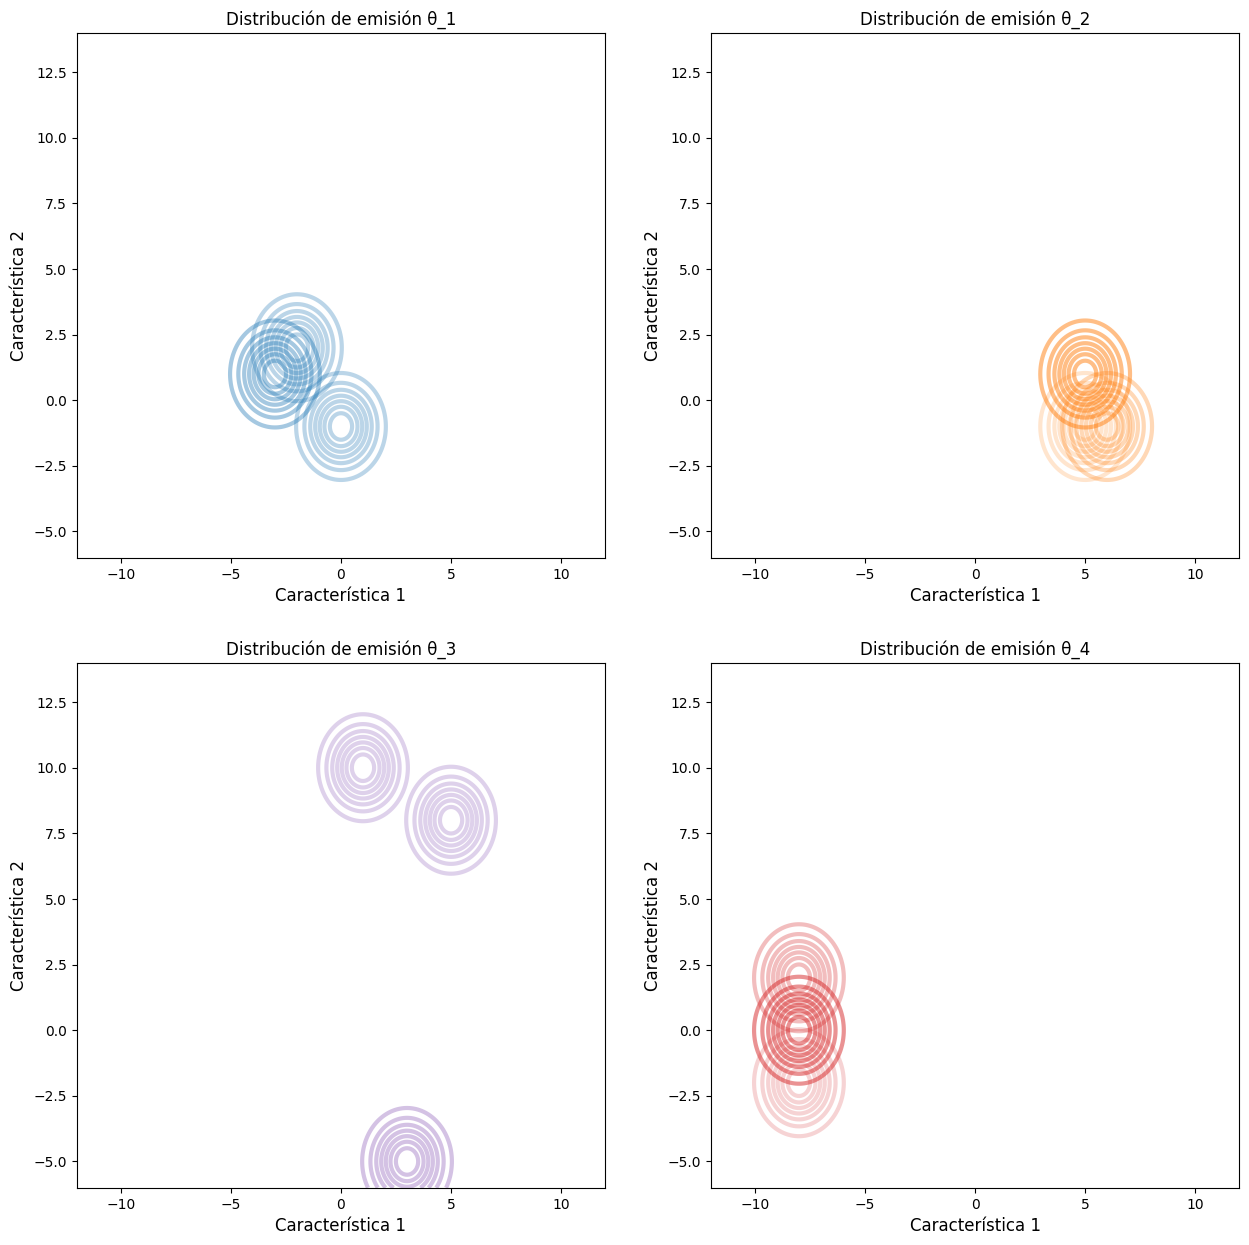

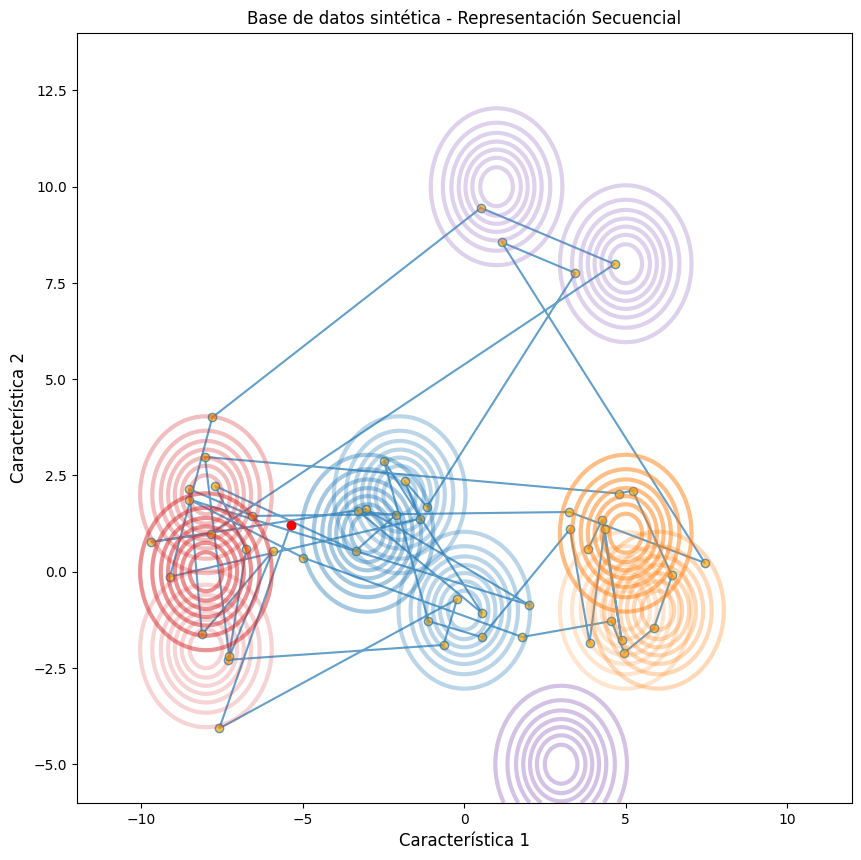

In [6]:
# Distribuciones de Probabilidad de emisión: GMM para cada estado
# Numero de componentes gaussianas
n_gaussians = 3

# 1) Pesos de las componentes gaussianas de las GMM
# pesos_{i,j} corresponde al peso de la componente j del estado i
weights2 = np.array([[0.3, 0.3, 0.4],
                     [0.2, 0.5, 0.3],
                     [0.4, 0.3, 0.3],
                     [0.5, 0.3, 0.2]])

# 2) Vectores de medias de las componentes gaussianas de las GMM
# mu_{i,j} corresponde al vector de medias de la componente j del estado i (vector 2D)
mu2 = np.array([[[-2.0, 2.0], [0.0, -1.0], [-3.0, 1.0]],
                [[5.0, -1.0], [5.0, 1.0], [6.0, -1.0]],
                [[3.0, -5.0], [1.0, 10.0], [5.0, 8.0]],
                [[-8.0, 0.0], [-8.0, 2.0], [-8.0, -2.0]]])


#3) Matrices de covarianza de las componentes Gaussianas de las GMM
# sigma_{i,j} corresponde a la matriz de covarianzas de la componente j del estado i (vector 2D)
sigma2 = np.tile(np.identity(2), (4, 3, 1, 1))

# Inicialización del modelo:
HMM2 = hmm.GMMHMM(n_components=N, covariance_type="full")
HMM2.startprob_ = pi
HMM2.transmat_ = A
HMM2.means_ = mu2
HMM2.weights_ = weights2
HMM2.covars_ = sigma2
HMM2.n_mix = n_gaussians

######################################################################### 1.1C
# Representación de las distribuciones de emisión para cada estado
# Definición de los ejes
x_axis = np.linspace(-12,12,300)
y_axis = np.linspace(-6,14,300)

# Generación de matrices con los ejes
_X, _Y = np.meshgrid(x_axis, y_axis)
# Agrupamiento por pares
positions = np.vstack([_X.ravel(), _Y.ravel()]).T

colors = ['tab:blue','tab:orange','tab:purple','tab:red']

# Generación de la figura
fig, ax = plt.subplots(2,2,figsize=(15, 15))

ax = ax.ravel()
for n in range(N):

    for g in range(n_gaussians):
        # TO DO: Evaluación de cada una de las componentes gaussianas en los ejes
        eval_multivariate_gaussian= multivariate_normal.pdf(positions, 
                                                            HMM2.means_[n][g], 
                                                            HMM2.covars_[n][g])
        prob = np.reshape(eval_multivariate_gaussian, _X.shape)
        # Representación del contorno
        ax[n].contour(x_axis, y_axis, prob, colors=colors[n], linewidths=3, alpha = HMM2.weights_[n][g])
        # Etiquetas y título
        ax[n].set_xlabel('Característica 1', fontsize=12)
        ax[n].set_ylabel('Característica 2', fontsize=12)
        ax[n].set_title('Distribución de emisión \u03B8_{:.0f}'.format(n+1) )

plt.show();

######################################################################### 1.2
X2, Z2 = HMM2.sample(T)

T_repr=50

# Representación de los datos mediante un scatter plot
fig2,ax2 = plt.subplots(figsize=(10,10))

# Representación de los datos mediante un scatter plot
# Para mostrar el desarrollo de la secuencia
ax2.plot(X2[:T_repr,0],X2[:T_repr,1],'o-',label='observations',mfc='orange',alpha=0.7)
ax2.plot(X2[0:1,0],X2[0:1,1],'or')
ax2.set_xlabel('Característica 1', fontsize=12)
ax2.set_ylabel('Característica 2', fontsize=12)
ax2.set_title('Base de datos sintética - Representación Secuencial' )


for n in range(N):
  for g in range(n_gaussians):
    # TO DO: Evaluación de cada una de las componentes gaussianas en los ejes
    eval_multivariate_gaussian= multivariate_normal.pdf(positions,
                                                        HMM2.means_[n][g],
                                                        HMM2.covars_[n][g])
    prob = np.reshape(eval_multivariate_gaussian, _X.shape)
    ax2.contour(x_axis, y_axis, prob,colors=colors[n],linewidths=3, alpha=HMM2.weights_[n][g])

Ahora se utiliza una Mixtura de Gaussianas para cada estado de tal forma que cada estado no se repesenta por una única gaussiana sino que hay varias que lo conforman.

**b) Repetir los apartados del ejercicio 1.1 y 1.2 utilizando un modelo `HMM3` que se diferencia del modelo `HMM1` en la matriz de probabilidades de transición y las probabilidades iniciales de estado:**

$$A=\begin{bmatrix}
0.7 & 0.15 & 0.15 & 0 \\
0 & 0.8 & 0.15 & 0.05 \\
0 & 0 & 0.9 & 0.1\\
0 & 0 & 0 & 1
\end{bmatrix}
$$

$$
\pi = [0.9\; 0.1\; 0.0\; 0.0]
$$

**`Nota`**: Las secuencias X y Z generadas tras el muestreo de `HMM3` se guardarán en las variables X3 y Z3, para no sobreescribir las secuencias ya generadas.



![alt text](Grafo_2.png)

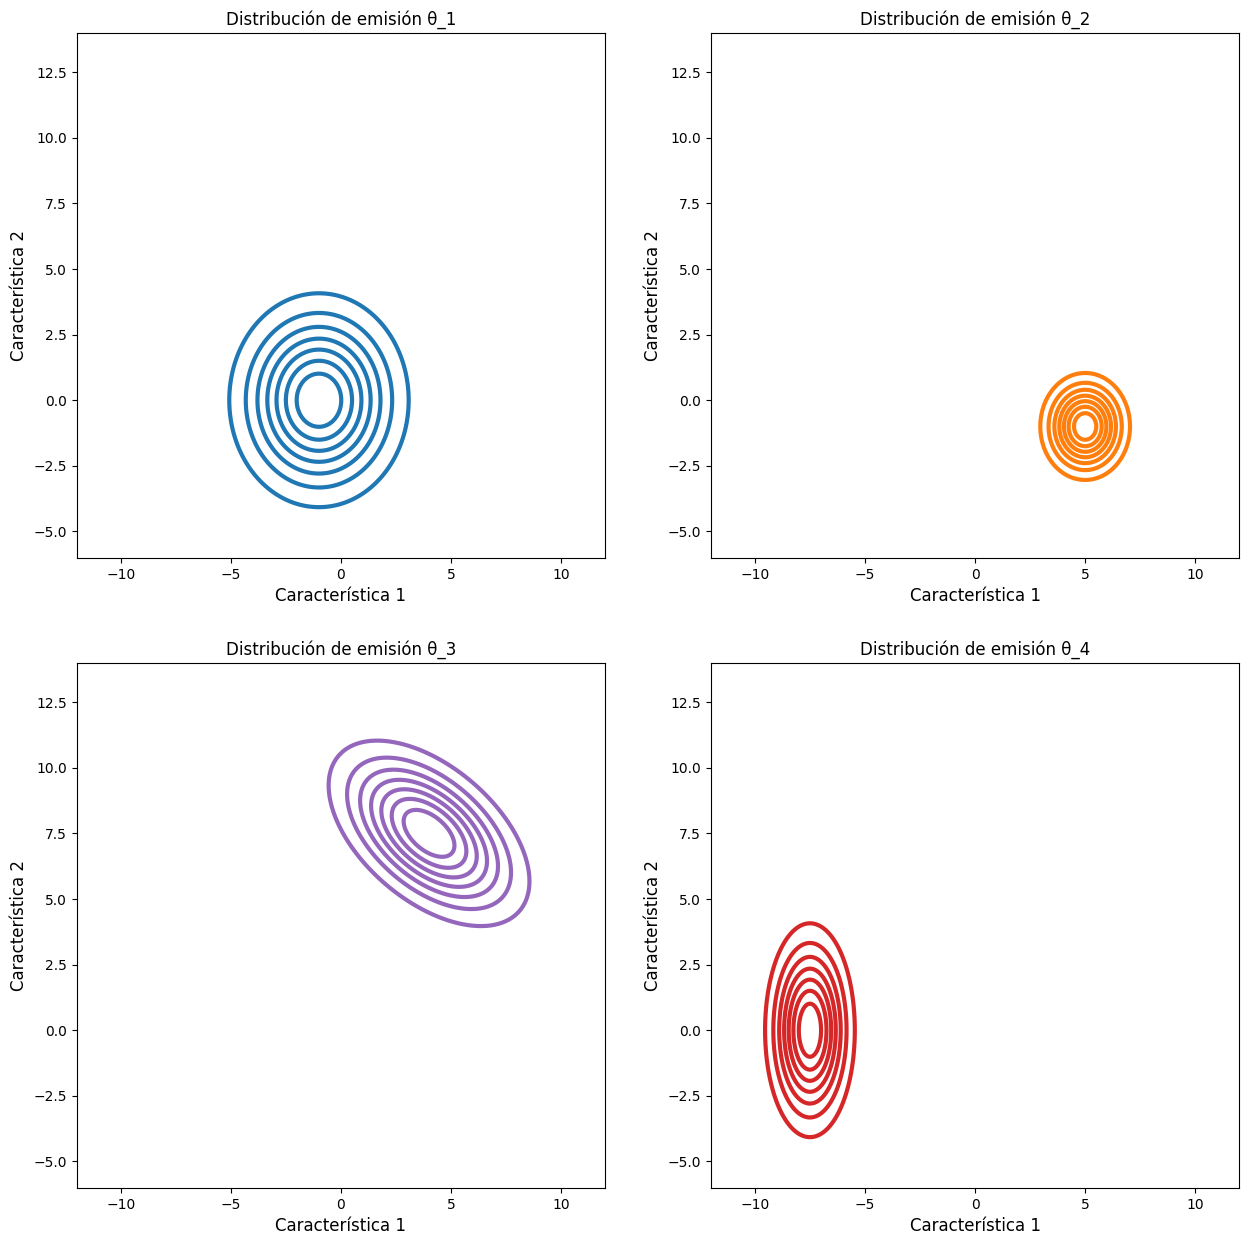

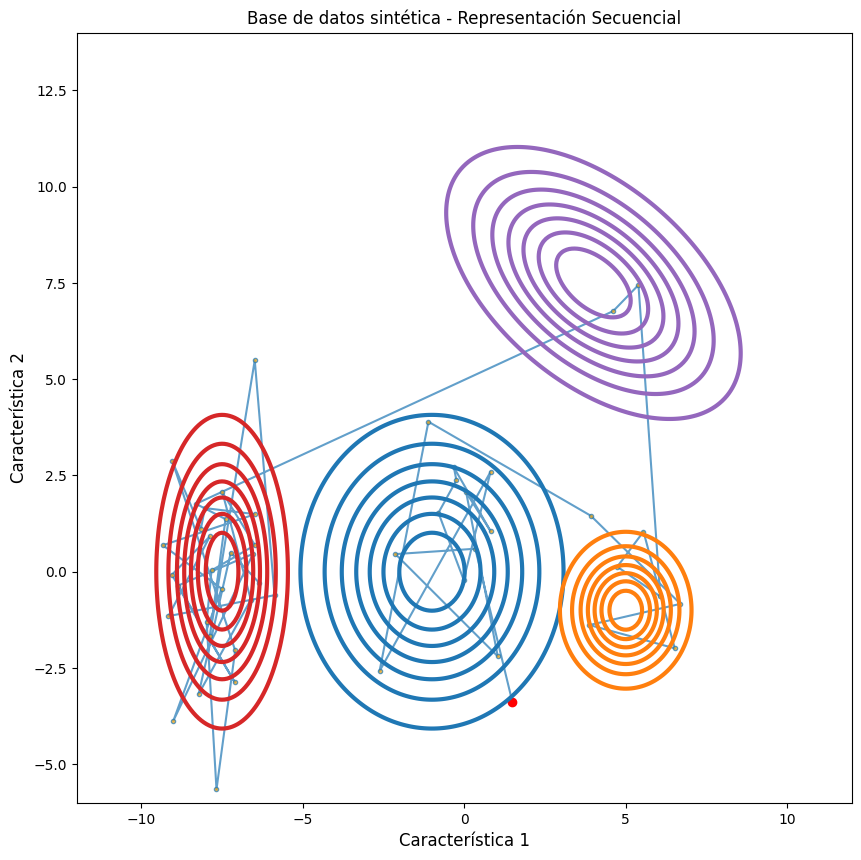

In [7]:
# Guardamos el modelo anterior con el nombre HMM1
import copy


# TO DO: Definición Matriz de Probabilidad de Transicion
A3 = np.array([[0.7, 0.15, 0.15, 0.0],
               [0.0, 0.8, 0.15 ,0.05],
               [0.0, 0.0, 0.9 ,0.1],
               [0.0, 0.0, 0.0 ,1.0]])

# TO DO: Definición
pi3 = np.array([0.9, 0.1, 0.0, 0.0])

# TO DO: Definición del modelo HMM3
HMM3 = hmm.GaussianHMM(n_components=N, covariance_type="full")
HMM3.startprob_ = pi3
HMM3.transmat_ = A3
HMM3.means_ = mu
HMM3.covars_ = Sigma
HMM3.n_features = mu.shape[1]

# Apartado c)

# Generación de la figura
fig, ax = plt.subplots(2,2,figsize=(15, 15))
ax = ax.ravel()

for n in range(N):

    # TO DO: Evaluación de cada una de las componentes gaussianas en los ejes
    eval_multivariate_gaussian= multivariate_normal.pdf(positions, 
                                                        HMM3.means_[n], 
                                                        HMM3.covars_[n])
    prob = np.reshape(eval_multivariate_gaussian, _X.shape)
    # Representación del contorno
    ax[n].contour(x_axis, y_axis, prob, colors=colors[n],linewidths=3)

    # Etiquetas y título
    ax[n].set_xlabel('Característica 1', fontsize=12)
    ax[n].set_ylabel('Característica 2', fontsize=12)
    ax[n].set_title('Distribución de emisión \u03B8_{:.0f}'.format(n+1) )

# Apartado d)
# Muestreo ancestral -> Atributo .sample
# X: np.array TxD -> Secuencia de observaciones
# Z: np.array Tx1 -> Estados ocultos
X3, Z3 = HMM3.sample(T)


# Apartado e)
# Representación de los datos mediante un scatter plot
fig,ax = plt.subplots(figsize=(10,10))

# Representación de los datos mediante un scatter plot
# Para mostrar el desarrollo de la secuencia
ax.plot(X3[:T_repr,0],X3[:T_repr,1],'.-',label='observations',mfc='orange',alpha=0.7)
ax.plot(X3[0:1,0],X3[0:1,1],'o-r')
ax.set_xlabel('Característica 1', fontsize=12)
ax.set_ylabel('Característica 2', fontsize=12)
ax.set_title('Base de datos sintética - Representación Secuencial' )

for n in range(N):
    # Evaluación de cada una de las componentes gaussianas en los ejes
    eval_multivariate_gaussian= multivariate_normal.pdf(positions, 
                                                        HMM3.means_[n], 
                                                        HMM3.covars_[n])
    prob = np.reshape(eval_multivariate_gaussian, _X.shape)
    # Representación del contorno
    ax.contour(x_axis, y_axis, prob, colors=colors[n],linewidths=3)

A partir de la matriz de transiciones, podemos ver de nuevo que es mucho más probable una vez se está en un estado, mantenerse en él. De hecho, hay una probabilidad superior al 70% para todos los estados mientras que para saltar de un estado a otro diferente hay una probabilidad del 30% como mucho (para los estados $S_2$, $S_3$ y $S_4$ este valor es menor, siendo la probabilidad de transición del estado $S_4$ a otro estado nula). Esto es justo lo que se observa en la figura, donde las transiciones entre estados (las líneas largas) son mucho menos comunes que las transiciones dentro de un mismo estado. Además, se puede ver que al pasar de un estado a otro, el estado original nunca se vuelve a presentar, lo que diferencia este modelo de los dos anteriores. Al llegar al estado $S_4$ (el rojo) ya no se puede volver a los anteriores.

**PREGUNTA 1: ¿Qué tipo de HMMs son según su topología? ¿En qué difieren los modelos `HMM1`, `HMM2` y `HMM3`? Incluir una imagen representando el diagrama de estados de cada modelo en el informe de la práctica.**


Los diagramas de estados ya se han mostrado con anterioridad, siendo el diagrama del `HMM1` y del `HMM2` idénticos. Estos dos modelos según su topología son ergódicos ya que todas las probabilidades de la matriz de transición $a_{ij}$ son mayores que cero. La diferencia fundamental ente estos dos modelos es que la probabilidad de observación de los estados del `HMM1` se representan como una única gaussiana mientras que para el `HMM2` esta probabilidad de trnasición se representa como una mixtura de gaussianas. Por otro lado, el `HMM3`es un modelo Bakis en el que nunca se puede regresar a un estado anterior. Esto se debe a que hay probabilidades $a_{ij}$ que son iguales a cero en la matriz de transición.

## Parte 2: Problemas clásicos de los modelos ocultos de Markov.

### 2.1: Problema de puntuación

Dado el modelo $\lambda = (A,  \mathbf{B}, \pi)$ y un conjunto de observaciones $\mathrm{X}= \{ \mathrm{x}_1, ..., \mathrm{x}_N \}$ el cálculo de $P(X|\lambda)$ o la verosimilitud del modelo $\lambda$ con los datos $\mathrm{X}$ se realiza mediante el algoritmo *Forward*.

Este algoritmo queda descrito por el siguiente pseudocódigo:

___________________________________________
**Algoritmo Forward**
Entrada: $ \boldsymbol{X}, A, \mathbf{B}, \pi$
___________________________________________
- $[\phi_1] = \text{Eval \_Px\_ z}(X_1, \mathbf{B})$
- $[\alpha_1, C_1] = \text{Normalize}(\phi_1\odot\pi)$

- **for** $t=2:N$ **do**:
  - $[\phi_t] = \text{Eval\_ Px\_ z}(X_t, \mathbf{B})$
  - $[\alpha_t, C_t] = \text{Normalize}(\phi_t \odot (A^T\alpha_{t-1}))$

- **Return** $\alpha_{1:N}$, $\log P(X_{1:N}) = \sum_t \log C_t$



In [8]:
####################################################################################
# Función Normalize
# Descripción: Función para la normalización de un vector. Se va a utilizar para
# el cálculo de las probabilidades a posteriori del estado P(Z|X) = P(X,Z)/P(X)
#
# Entradas:
#   u: np.array Nx1 correspondiente a P(X|Z)
# Salidas:
#   alfa: Nx1 P(Z|X) probabilidades a posteriori de cada estado
#   C: 1x1 P(X) probabilidad marginal de la secuencia de observaciones
#           (marginalizando los estados)
####################################################################################
def Normalize(u):
    C = np.sum(u)
    alfa = u/C

    return alfa,C

**a.) Complete la función Eval_Px_z para calcular la probabilidad de observación dado cada estado para el modelo `HMM1` en el que la probabilidad de observación de cada estado viene definida por una distribución Gaussiana bivariada.**

**Compruebe su funcionamiento con la primera muestra de nuestra base de datos X**

In [9]:
####################################################################################
# Función eval_Px_Z
# Descripción: Función para la obtención de P(X|Z). Evaluación de X en cada una
# de las gaussianas (estados)
#
# Entradas:
#   data: muestra de dimensión D de la secuencia de observaciones de entrada
#   B: Lista con las Gaussianas de cada estado. Lista de elementos clase
#             multivariate_normal
# Salidas:
#    fi: P(X|Z) : Probabilidad devuelta por la Gaussiana de cada estado
####################################################################################
def eval_Px_Z(data, B):
    fi = np.empty((len(B),1))
    for k, g in enumerate(B):
        if callable(g):
            fi[k] = g(data)
        else:
            fi[k] = g.pdf(data)
    return fi

In [10]:
# Se almacenan las Gaussianas de cada estado en una lista
# Al no ser entrenadas, necesitan la definición de todos sus parámetros
B = []
for n in range(N):
    Gaussian_states = multivariate_normal(mean=mu[n], cov=Sigma[n])
    B.append(Gaussian_states)

# TO DO: Llamada a la función eval_Px_Z
fi= eval_Px_Z(X[0],B)
u = HMM1.startprob_ * fi
alfa, C = Normalize(u)

# TO DO: Devolver X[0], P(X[0]|lambda)
print('P(X[0]|lambda) = ', fi)
print('X[0] = {}'.format(X[0]))

P(X[0]|lambda) =  [[1.30580844e-04]
 [3.62025133e-02]
 [4.93451061e-06]
 [6.45134967e-40]]
X[0] = [5.74159174 0.55291372]


El punto $\approx$ (6, 1) está más cerca de la gaussiana naranja ($S_2$) por lo que era de esperar que su probabilidad sea la mayor. Además, de la gaussiana azul ($S_1$) y de la gaussiana morada ($S_3$) están relativamente cerca también por lo que sus probabilidades son más bajas que para la naranja pero no tan bajas como la roja.

**b.) A partir del pseudocódigo del enunciado, complete la función Forward que realiza el proceso completo para el cálculo de la verosimilitud de una secuencia $\boldsymbol{X}$ dado el HMM del primer ejercicio.**

**Analice la función Forward para saber qué representan los parámetros $\phi$, $\alpha$ y $C$.**

In [11]:
####################################################################################
# Función Forward
# Descripción: Implementa el algoritmo forward para la obtención de P(X|HMM)
#
# Entradas:
#   data: np.array TxD secuencia de observaciones de entrada
#   A:    np.array NxN Matriz de probabilidades de transición
#   pi:   np.list Nx1 Probabilidades de estado iniciales
#   B: Lista con los parámetros de los GMMs de cada estado
# Salidas:
#    log_likelihood: Logaritmo de la verosimilitud P(X\HMM)
####################################################################################
def Forward(data,A,pi,B):
    # Inicialización de las variables: logaritmo de la verosimilitd
    # alpha: Matriz en la que se van a almacenar las P(Z|X)
    log_likelihood = 0
    alpha= np.zeros((len(B),np.size(data,0)))

    # 1) Primera muestra
    pi = pi.reshape((len(B),1))
    # TODO Calcular fi P(X_i|Z) sin normalizar
    fi = eval_Px_Z(data[0],B)

    # TODO calcular alfa P(X_i|Z) y C P(X_i)
    alfa,C =  Normalize(pi*fi)

    # Almacenamiento de las prob
    alpha[:,0]=alfa.ravel()

    # TO DO: Calculo del logaritmo de la probabilidad para la primera muestra
    log_likelihood = np.log(C)

    # 2) Para el resto de las muestras
    for i in range(1,np.size(data,0)):

        # 2.1 TO DO:  Calculo de fi
        fi = eval_Px_Z(data[i],B)
        # 2.2 TO DO:calculo de alfa en el instante t dado alfa en t-1
        alfa,C = Normalize(fi*A.T @alfa)

        alpha[:,i]=alfa.ravel()
        # 2.3 TO DO: Se suma el logaritmo de la probabilidad marginal
        log_likelihood = log_likelihood+np.log(C)
    return log_likelihood

In [12]:
# LLamada a la función Forward -> Devuelve el logaritmo de la verosimilitud
loglikelihood= Forward(data=X,A=A,pi=pi,B=B)
print('El logaritmo de la verosimilitud del modelo con la secuencia de observaciones X P(X|\u03BB) es {:.4f}'.format(loglikelihood))

El logaritmo de la verosimilitud del modelo con la secuencia de observaciones X P(X|λ) es -17744.3343


* $\phi$: es el vector de verosimilitud de la observación actual para cada estado. Es decir, para la muestra $X_i$, se calcula $\phi = P(X_i | Z)$.

* $\alpha$: representa los valores forward normalizados. En cada instante $t$, $\alpha_t$ almacena la probabilidad acumuladas de haber observado la secuencia hasta este momento y encontrarse en un estado concreto.

* $C$: es la constante de normalizaión que se utiliza para escalar los valores de $\alpha$ en cada paso.

**b.) Compruebe el resultado obtenido en el apartado anterior con el resultado al aplicar la función de `hmmlearn` (método `.score`) para el cálculo de la verosimilitud mediante el algoritmo *Forward*.**

In [13]:
# TO DO: Implementación del algoritmo Forward en el atributo .score del HMM
loglikelihood = HMM1.score(X)

print('El logaritmo de la verosimilitud del modelo con la secuencia de observaciones X P(X|\u03BB) es {:.4f}'.format(loglikelihood))

El logaritmo de la verosimilitud del modelo con la secuencia de observaciones X P(X|λ) es -17744.3343


Como se puede observar, los resultados son iguales por lo que la implementación del algoritmo Forward está bien hecha.

**PREGUNTA 2: ¿Cuál de los tres modelos `HMM1`, `HMM2` y `HMM3` maximiza el logaritmo de la verosimilitud? ¿Es este resultado el esperado? Justifique su respuesta.**

**`Nota`**: Utilice para ello la función `Forward` implementada anteriormente o la función disponible en `hmmlearn`.


In [14]:
# HMM1
B_HMM1 = [multivariate_normal(mean=HMM1.means_[i], cov=HMM1.covars_[i])
          for i in range(HMM1.means_.shape[0])]
likelihood_ours = Forward(data=X, A = A, pi = HMM1.startprob_, B = B_HMM1)
likelihood_hmmlearn = HMM1.score(X)
print('Logaritmo de la verosimilitud HMM1 (nuestro): {:.4f}'.format(likelihood_ours))
print('Logaritmo de la verosimilitud HMM1 (HmmLearn): {:.4f}'.format(likelihood_hmmlearn))
print()

for n in range(N):
    for g in range(n_gaussians):
        # TO DO: Evaluación de cada una de las componentes gaussianas en los ejes
        eval_multivariate_gaussian= multivariate_normal.pdf(positions, 
                                                            HMM2.means_[n][g], 
                                                            HMM2.covars_[n][g])
# HMM2
B_HMM2 = [lambda x, n=n: sum(
                HMM2.weights_[n][g] * multivariate_normal.pdf(x,
                                                              mean=HMM2.means_[n][g],
                                                              cov=HMM2.covars_[n][g])
                for g in range(n_gaussians))
          for n in range(HMM2.weights_.shape[0])]

likelihood2_ours = Forward(data=X2, A=A, pi=HMM2.startprob_, B=B_HMM2)
likelihood2_hmmlearn = HMM2.score(X2)
print('Logaritmo de la verosimilitud HMM2 (nuestro): {:.4f}'.format(likelihood2_ours))
print('Logaritmo de la verosimilitud HMM2 (HmmLearn): {:.4f}'.format(likelihood2_hmmlearn))
print()

# HMM3
B_HMM3 = [multivariate_normal(mean=HMM3.means_[i], cov=HMM3.covars_[i])
          for i in range(HMM3.means_.shape[0])]
likelihood3_ours = Forward(data=X3, A = A3, pi = HMM3.startprob_, B = B_HMM3)
likelihood3_hmmlearn = HMM3.score(X3)
print('Logaritmo de la verosimilitud HMM3 (nuestro): {:.4f}'.format(likelihood3_ours))
print('Logaritmo de la verosimilitud HMM3 (HmmLearn): {:.4f}'.format(likelihood3_hmmlearn))

Logaritmo de la verosimilitud HMM1 (nuestro): -17744.3343
Logaritmo de la verosimilitud HMM1 (HmmLearn): -17744.3343

Logaritmo de la verosimilitud HMM2 (nuestro): -17304.5452
Logaritmo de la verosimilitud HMM2 (HmmLearn): -17304.5452

Logaritmo de la verosimilitud HMM3 (nuestro): -14100.6636
Logaritmo de la verosimilitud HMM3 (HmmLearn): -14100.6636


En vista de los resultados, el momdelo que maximmiza el logaritmos de la verosimilitud es el modelo `HMM3`. Esto es porque un modelo Bakis restringe las transiciones solo hacia estados futuros, lo que reduce la cantidad de caminos posibles y concentra la probabilidad en secuencias coherentes. Esto permite que el modelo se ajuste mejor a datos con estructura temporal natural. Por otro lado, un modelo ergódico permite transiciones arbitrarias, dispersando la probabilidad en rutas menos representativas. Como resultado, el logaritmo de la verosimilitud suele ser mayor en un modelo Bakis, ya que asigna mayor probabilidad a las secuencias observadas.

### 2.2: Problema de reconocimiento de estados

Dado una secuencia de observaciones $X = \{\mathrm{x}_1,...,\mathrm{x}_T\}$ y un modelo $\lambda = (\pi, A, \mathbf{B})$ el algoritmo de *viterbi* permite encontrar la secuencia de estados ocultos más probable , es decir, permite obtener la secuencia de estados que mejor ''explica'' las observaciones.

El algoritmo de viterbi queda descrito por el siguiente pseudocódigo:

_________________________________________________________
**Algoritmo de Viterbi** Entrada: $\boldsymbol{X}$, $A$, $\pi$, $\mathbf{B}$
_________________________________________________________
- $a_1=\boldsymbol{0}$
- $\phi_1 = \text{eval \_Px \_Z}(X_1,\mathbf{B})$
- $\delta = \pi \odot \phi_1$
- **for** $t=2:T$ **do**:
  - **for** $j = 1:N$ **do**:
  - $\phi_t = \text{eval\_ Px \_Z}(X_t,\mathbf{B})$
  - $[a_t(j), \delta_t(j)] =\text{max}_i(\text{log}\delta_{t-1}(:) + \text{log}A_{ij} +\text{log}\phi_t(j))$

- $S_T = \text{arg}\text{max}(\delta_T)$
- **for** $t = N-1:1$ **do**
  - $S_t = a_{t-1}S_{t+1}$

- **Return** S


**a.) Complete la función `viterbi` para que integre el algoritmo de viterbi para la decodificación de la secuencia más probable de estados dada una secuencia de observaciones.**

**Compruebe la secuencia resultante con los estados obtenidos al generar la base de datos.**

In [15]:
# %% Implementación del algoritmo de Viterbi:
import warnings
warnings.filterwarnings('ignore')

####################################################################################
# Función Viterbi
# Descripción: Implementa el algoritmo de viterbi para la generación de la secuencia
# de estados más probable dado un conjunto de observaciones y un modelo
#
# Entradas:
#   data: np.array TxD secuencia de observaciones de entrada
#   A:    np.array NxN Matriz de probabilidades de transición
#   pi:   np.list Nx1 Probabilidades de estado iniciales
#   B: Lista con los parámetros de los GMMs de cada estado
# Salidas:
#    S:  np.array Tx1 con la secuencia de estados más probable
####################################################################################
def viterbi(data,A,B,pi):
    # Inicialización de Matriz en la que vamos a ir guardando los estados más probables
    a = np.zeros((np.size(A,0),np.size(data,0)-1))
    # Inicialización en la que se van a ir guardando las mejores puntuaciones
    omega = np.zeros((np.size(A,0),np.size(data,0)))

    # 1) Incializacion Primera muestra
    pi = pi.reshape((len(B),1))
    fi = eval_Px_Z(data[0,:],B)
    omega[:,0] = np.log((pi*fi).ravel())

    # 2) Recursión
    for t in range(1,np.size(data,0)):
        for k in range(len(B)):

            # TO DO: Calculo de P(X|Z)
            fi = eval_Px_Z(data[t,:],B)

            # TO DO: calculo del logaritmo de las puntuaciones
            prob = omega[:,t-1] + np.log(A[:,k]) + np.log(fi[k])

            # TO DO: Calculo de la probabilidad máxima
            omega[k,t] = np.max(prob)
            # TO DO: Calculo del estado anterior más probable
            a[k,t-1] = np.argmax(prob)

    # Array con la secuencia de estados final
    S=np.zeros(np.size(data,0))

    # 3) Terminación
    ultimo_estado = np.argmax(omega[:,-1:])
    S[0] = ultimo_estado

    # 4) Path Backtracking
    indice_back = 1
    for i in range(np.size(data,0)-2,-1,-1):
        S[indice_back] = a[int(ultimo_estado),i]
        ultimo_estado = S[indice_back]
        indice_back +=1

    S = np.flip(S,axis=0)
    return S


In [16]:
# TO DO: LLamada a viterbi
SeqViterbi = viterbi(X,A,B,pi)
print("La secuencia de estados ocultos más probable es ",SeqViterbi)

La secuencia de estados ocultos más probable es  [1. 1. 1. ... 2. 2. 3.]


**b.) Haga uso de la función `.decode` de ``hmmlearn`` para la implementación del algoritmo viterbi para la decodificación de la secuencia más probable de estados dada una secuencia de observaciones.**

In [17]:
# TO DO: Implementacion de viterbi mediante .decode(algorithm='viterbi')

# HMM1
SeqViterbi1 = viterbi(X,A,B_HMM1,pi)
SeqViterbi1_hmmlearn = HMM1.decode(X)[1]
print("La secuencia (nuestra) de estados ocultos más probable de HMM1 es ",SeqViterbi1)
print("La secuencia (HmmLearn) de estados ocultos más probable de HMM1 es ",SeqViterbi1_hmmlearn)
print()

# HMM2
SeqViterbi2 = viterbi(X,A,B_HMM2,pi)
SeqViterbi2_hmmlearn = HMM2.decode(X)[1]
print("La secuencia (nuestra) de estados ocultos más probable de HMM2 es ",SeqViterbi2)
print("La secuencia (HmmLearn) de estados ocultos más probable de HMM2 es ",SeqViterbi2_hmmlearn)
print()

# HMM2
SeqViterbi3 = viterbi(X,A,B_HMM3,pi)
SeqViterbi3_hmmlearn = HMM3.decode(X)[1]
print("La secuencia (nuestra) de estados ocultos más probable de HMM3 es ",SeqViterbi3)
print("La secuencia (HmmLearn) de estados ocultos más probable de HMM3 es ",SeqViterbi3_hmmlearn)

La secuencia (nuestra) de estados ocultos más probable de HMM1 es  [1. 1. 1. ... 2. 2. 3.]
La secuencia (HmmLearn) de estados ocultos más probable de HMM1 es  [1 1 1 ... 2 2 3]

La secuencia (nuestra) de estados ocultos más probable de HMM2 es  [1. 1. 1. ... 2. 2. 3.]
La secuencia (HmmLearn) de estados ocultos más probable de HMM2 es  [1 1 1 ... 2 2 3]

La secuencia (nuestra) de estados ocultos más probable de HMM3 es  [1. 1. 1. ... 2. 2. 3.]
La secuencia (HmmLearn) de estados ocultos más probable de HMM3 es  [0 0 0 ... 2 2 3]


### 2.3: Problema de entrenamiento

Dado un conjunto de observaciones $X=\{\mathrm{x}_1,...,\mathrm{x}_T\}$ el cálculo de los parámetros que definen el modelo oculto de markov $\lambda = \left( \pi, A, \mathbf{B}\right)$ que maximizan la verosimilitud de los datos dado el modelo $P(X|\lambda)$ se obtiene mediante el algoritmo EM o, en este caso, el algoritmo *Baum-Welch*.

**a) Utilice la función `.fit` para entrenar un modelo oculto de markov a partir de los datos sintéticos generados en el ejercicio 1.**

**PREGUNTA 3: Analice los parámetros obtenidos y compárelos con el modelo generador de los datos. ¿Qué ocurre con el parámetro de los estados iniciales?**

In [18]:
# TO DO: Utilización de .fit para el entrenamiento de la clase Gaussian HMM
model_trained = hmm.GaussianHMM(n_components=N, covariance_type="full", n_iter=100, init_params="stmc")
model_trained.fit(X)

print("Distances:")
print("\t - A: {}".format(np.linalg.norm(HMM1.transmat_ - model_trained.transmat_, 'fro')))
print("\t - means: {}".format(np.linalg.norm(HMM1.means_.flatten() - model_trained.means_.flatten())))
print("\t - covars: {}".format(np.linalg.norm(HMM1.covars_.flatten() - model_trained.covars_.flatten())))

Distances:
	 - A: 1.0274683055858875
	 - means: 15.452527343718822
	 - covars: 14.800383127982673


Después del entrenamiento, podemos inspeccionar los parámetros aprendidos:

- **Matriz de transición (A)** y **parámetros de las gaussianas (medias y covarianzas)**:  
  En general, se observa que estos parámetros se aproximan bastante a los valores usados en el modelo generador, ya que influyen fuertemente en el valor de la verosimilitud sobre secuencias largas.

- **Parámetro de estados iniciales (π)**:  
  Aquí ocurre algo interesante. Debido a que el efecto de la distribución inicial se “desvanece” en secuencias largas (cuando $ T $ es grande) y el algoritmo Baum–Welch se enfoca en maximizar la probabilidad global $ P(X|\lambda) $, el parámetro π suele converger a una distribución que se aproxima a la distribución estacionaria de la cadena (derivada de la matriz de transición) y no necesariamente recupera los valores exactos con los que se generaron los datos.  
  Esto se debe a que, en la práctica, el impacto de la distribución de estados iniciales es pequeño en secuencias de alta longitud, por lo que la información disponible para estimarla es muy limitada. En consecuencia, el modelo entrenado puede tener π que difiera notablemente del vector original.


**b.) Realice el entrenamiento del modelo utilizando varias secuencias generadas sintéticamente a partir del muestreo ancestral del primer modelo. Compare los parámetros del modelo aprendido con el primer modelo.**

In [19]:
# Supongamos que tenemos diferentes secuencias de entrenamiento
X1,Z1 = HMM1.sample(4000)
X2,Z2 = HMM1.sample(4000)
X3,Z3 = HMM1.sample(4000)
X4,Z4 = HMM1.sample(4000)
X5,Z5 = HMM1.sample(4000)

# Concatenamos todas las secuencias que tenemos
X_total = np.concatenate([X,X1,X2,X3,X4,X5],axis=0)
# Determinamos la longitud de cada cadena
lengths = np.array([len(X),len(X1), len(X2), len(X3),len(X4), len(X5)])

# TO DO: Utilización de .fit para el entrenamiento de la clase Gaussian HMM
model_trained = hmm.GaussianHMM(n_components=N, covariance_type="full",
                                n_iter=100, init_params="stmc")
model_trained.fit(X_total, lengths)

print("Distances:")
print("\t - A: {}".format(np.linalg.norm(HMM1.transmat_ - model_trained.transmat_, 'fro')))
print("\t - means: {}".format(np.linalg.norm(HMM1.means_.flatten() - model_trained.means_.flatten())))
print("\t - covars: {}".format(np.linalg.norm(HMM1.covars_.flatten() - model_trained.covars_.flatten())))


Distances:
	 - A: 1.2917432492555885
	 - means: 18.538443935255884
	 - covars: 13.094750571041128


Al entrenar con varias secuencias, se observa lo siguiente al comparar con el modelo generador:

- **Matriz de transición y parámetros de emisión (medias y covarianzas):**  
  Con suficientes secuencias, estos parámetros tienden a aproximarse bien a los valores originales del modelo generador, ya que la información acumulada favorece su estimación.

- **Estados iniciales (π):**  
  Tal como se observó en el caso anterior, los estados iniciales suelen no recuperarse exactamente. Debido a que en secuencias largas (o al concatenar varias secuencias) su influencia es menor, el vector π aprendido tiende a ajustarse hacia la distribución estacionaria impuesta por la matriz de transición.

## Parte 3: Clasificación de patrones temporales mediante HMMs

**Caso Ficticio**: Una empresa dedicada al suministro y gestión de maquinaria industrial desea identificar si las averías presentes en sus equipos se deben a un fallo en un componente o debido a un uso indebido de los mismos. Esto es considerado una tarea clave para la empresa, pues en el caso de que las averías se debiesen a un fallo debido a su incorrecto uso, serían los usuarios los responsables de financiar el arreglo.

Para ello, el personal técnico decide instalar determinados sensores para medir la vibración y la velocidad de funcionamiento de las máquinas. Tras varios meses de funcionamiento, los sensores capturan secuencias de ambas medidas normalizadas en diferentes circunstancias.

De esta forma, se recogen 10 secuencias asociadas a averías debido al fallo de un componente, 10 secuencias asociadas a averías debido a su uso indebido y, por último, 10 secuencias en las que el equipo no presenta avería alguna.

Las medidas se pueden encontrar en los ficheros "uso_inapropiado.csv", "fallo_componente.csv" y "sin_averias.csv".

De cara a poder clasificar dichas averías, se decide entrenar un modelo oculto de Markov para modelar cada una de los casos de estudio.

**a.) Cargue los datos de entrenamiento haciendo uso de la función `pandas.read_csv`.**

In [20]:
# Carga de los datos
import pandas as pd


sin_averias = pd.read_csv('sin_averias.csv',index_col=0).values
fallo_componente = pd.read_csv('fallo_componente.csv',index_col=0).values
uso_inapropiado = pd.read_csv('uso_inapropiado.csv',index_col=0).values

**b.) Realice el entrenamiento de un modelo oculto de markov con distribuciones de emisión gaussianas que modele cada uno de los casos de estudio. Para ello, al igual que se hizo en el ejercicio anterior, utilice el paquete ``hmmlearn``.**

**Represente los parámetros de cada uno de los modelos.**

In [21]:
# Entrenamiento de un modelo por cada clase
lengths = np.array([50 for i in range(10)])

#Número de estados del modelo (puede ajustarse según el problema)
n_components = 3

# Entrenamiento de un modelo por cada clase usando GaussianHMM
model_sin = hmm.GaussianHMM(n_components=n_components, covariance_type="full", n_iter=100, random_state=42)
model_fallo = hmm.GaussianHMM(n_components=n_components, covariance_type="full", n_iter=100, random_state=42)
model_uso = hmm.GaussianHMM(n_components=n_components, covariance_type="full", n_iter=100, random_state=42)

model_sin.fit(sin_averias, lengths)
model_fallo.fit(fallo_componente, lengths)
model_uso.fit(uso_inapropiado, lengths)

# Función para mostrar los parámetros del modelo
def print_model_parameters(model, model_name):
    print(f"--- {model_name} ---")
    print("Estados iniciales (π):")
    print(model.startprob_)
    print("\nMatriz de transición (A):")
    print(model.transmat_)
    print("\nMedias de las emisiones:")
    print(model.means_)
    print("\nCovarianzas:")
    print(model.covars_)
    print("\n" + "="*50 + "\n")

# Representación de los parámetros de cada modelo
print_model_parameters(model_sin, "Modelo: Sin Averías")
print_model_parameters(model_fallo, "Modelo: Fallo de Componente")
print_model_parameters(model_uso, "Modelo: Uso Inapropiado")

--- Modelo: Sin Averías ---
Estados iniciales (π):
[2.02221218e-09 9.99999997e-01 4.92451405e-10]

Matriz de transición (A):
[[5.62102289e-04 9.99407581e-01 3.03164412e-05]
 [8.30147193e-01 1.48102847e-03 1.68371778e-01]
 [6.26291873e-01 1.33740312e-01 2.39967815e-01]]

Medias de las emisiones:
[[ 0.49912635  0.54203999]
 [ 0.47322048  0.50780522]
 [-0.09848816  0.76988357]]

Covarianzas:
[[[ 0.1172349   0.02881708]
  [ 0.02881708  0.11852499]]

 [[ 0.09111932 -0.00363243]
  [-0.00363243  0.09819701]]

 [[ 0.04301745  0.00767595]
  [ 0.00767595  0.04266676]]]


--- Modelo: Fallo de Componente ---
Estados iniciales (π):
[2.01200802e-17 5.72776098e-18 1.00000000e+00]

Matriz de transición (A):
[[2.27705003e-02 9.77229318e-01 1.82135417e-07]
 [8.27109684e-01 1.72830915e-01 5.94010627e-05]
 [1.15472493e-01 2.17812925e-01 6.66714582e-01]]

Medias de las emisiones:
[[0.0413608  0.43161207]
 [0.14429086 0.57481658]
 [0.64938765 0.65961223]]

Covarianzas:
[[[ 0.07475867 -0.01223711]
  [-0.0122

**c.) Tras el entrenamiento de los modelos, se obtiene una secuencia relacionada con la posible avería de un equipo nuevo. Cargue los datos del fichero ``test.csv``.**

In [22]:
test_data = pd.read_csv('test.csv', index_col=0).values

# Visualizamos un resumen de los datos
print("Datos del fichero test.csv:")
print(test_data)

Datos del fichero test.csv:
[[ 0.86292319  0.3960825 ]
 [-0.83352941 -0.31779128]
 [-0.53882419 -0.12989764]
 [ 0.04012834  0.39056937]
 [-0.54496601 -0.68382004]
 [ 0.52953146  0.46259887]
 [-0.29253732  0.56790046]
 [ 0.73395402  0.15249632]
 [ 0.04337071  1.27828006]
 [ 0.17876951 -0.03519972]
 [-0.56574701  0.59689109]
 [-0.31791435 -0.10594746]
 [-0.19303305 -0.81277601]
 [ 0.7634765   0.08079959]
 [ 0.39060761  0.14225818]
 [ 0.32360584  0.31648013]
 [ 0.5348124   0.24963605]
 [-0.6180026   0.07422545]
 [-0.01278046 -0.07392123]
 [ 0.63446332  0.45039457]
 [-0.42736805 -0.24895473]
 [ 0.74315528  0.14431649]
 [ 0.33490244  1.25940123]
 [ 0.34248751  0.41901497]
 [ 0.07644902  1.87308154]
 [-0.82446581  0.06544991]
 [-0.02570923 -0.5971994 ]
 [ 0.2416735   0.37093398]
 [ 0.47290507  0.22723035]
 [-0.36368552  0.1408026 ]
 [ 1.20646631  0.71196942]
 [-0.36703912  0.7291168 ]
 [ 0.89208789  0.23241494]
 [-0.30860979  0.54431276]
 [ 0.79789199  0.54726987]
 [-0.50036333 -0.16673188]



**PREGUNTA 4: A partir de los modelos generados anteriormente ¿Está la máquina averiada? En caso de estar averiada, dicha avería ¿es debida a un fallo de fabricación o a un uso indebido?**

In [23]:
test_sequence = pd.read_csv('test.csv',index_col=0).values

In [24]:
log_likelihood_usoInapropiado   = model_uso.score(test_sequence)
log_likelihood_falloComponente  = model_fallo.score(test_sequence)
log_likelihood_sinAverias       = model_sin.score(test_sequence)

print("Log likelihood uso inapropiado: ", log_likelihood_usoInapropiado)
print("Log likelihood fallo componente: ", log_likelihood_falloComponente)
print("Log likelihood sin averías: ", log_likelihood_sinAverias)

# Identificamos el mayor log likelihood
scores = {
    "sin averías": log_likelihood_sinAverias,
    "fallo de componente": log_likelihood_falloComponente,
    "uso inapropiado": log_likelihood_usoInapropiado
}

clasificacion = max(scores, key=scores.get)

print("\nClasificación del test:")
if clasificacion == "sin averías":
    print("La máquina no presenta averías.")
elif clasificacion == "fallo de componente":
    print("La máquina está averiada. La avería se debe a un fallo de fabricación.")
elif clasificacion == "uso inapropiado":
    print("La máquina está averiada. La avería se debe a un uso inapropiado.")


Log likelihood uso inapropiado:  -90.47551775917776
Log likelihood fallo componente:  -132.30613097239785
Log likelihood sin averías:  -150.63781389252557

Clasificación del test:
La máquina está averiada. La avería se debe a un uso inapropiado.


Vemos que la verosimilitud mayor es debida a un uso inapropiado con gran diferencia por lo que se podría afirmar que la máquina está averiada por un uso inapropiado.